# LDA for Feature Extraction and Classification

Apply LDA to reduce data dimensionality from to 2, 3 and 9. Visualize distribution of the sampled data (as in the PCA section) with dimensionality of 2 and 3 respectively (similar to PCA). Report the classification accuracy for data with dimensions of 2, 3 and 9 respectively, based on nearest neighbor classifier. Report the classification accuracy on the CMU PIE test images and your own photo seperately.

### Read all the images

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
def read_images():
    dir='PIE'
    PIE=os.listdir(dir)
    all_img = []
    img_folders=[dir+'/' + photo for photo in PIE]
    selected_subjects = np.random.choice(range(len(img_folders)), 20, replace=False)
    
    selected_sub_folders = [img_folders[index] for index in selected_subjects]
    print('Selected Subjects:')
    print(selected_sub_folders)

    for img_dir in selected_sub_folders:
        img_path=os.listdir(img_dir)
        img_dir_index=[img_dir+'/' + photo for photo in img_path]
        all_img.append(img_dir_index)

    flat_list = []
    for sublist in all_img:
        for item in sublist:
            flat_list.append(item)
    
    images = np.array([plt.imread(image) for image in flat_list], dtype=np.int16)
    labels = np.zeros((len(images)))

    for i, path in enumerate(flat_list):
        labels[i] = path.split('/')[1]
    return images, labels

In [3]:
def read_my_images():
    my_img_path = 'my_images'
    img_list=os.listdir(my_img_path)
    print(img_list)
    my_images = np.array([plt.imread(my_img_path + '/' + image) for image in img_list], dtype=np.int16)
    my_labels = np.full((10), 69)
    return my_images, my_labels

In [4]:
images, labels = read_images()
n_samples, image_size, _ = images.shape
n_features = image_size * image_size

Selected Subjects:
['PIE/31', 'PIE/25', 'PIE/66', 'PIE/33', 'PIE/4', 'PIE/56', 'PIE/60', 'PIE/58', 'PIE/17', 'PIE/37', 'PIE/55', 'PIE/11', 'PIE/10', 'PIE/54', 'PIE/9', 'PIE/7', 'PIE/29', 'PIE/49', 'PIE/27', 'PIE/32']


In [5]:
my_images, my_labels = read_my_images()

['8.jpg', '9.jpg', '4.jpg', '5.jpg', '7.jpg', '6.jpg', '2.jpg', '3.jpg', '1.jpg', '0.jpg']


### Randomly select 500 images

In [6]:
def select_images(images, labels, select_num):
    num_images = len(images)
    np.random.seed(99)
    if select_num == len(images):
        return images.reshape([select_num, n_features]), labels
    rand_images_list = np.random.randint(0, num_images, select_num)
    X = images[rand_images_list].reshape([select_num, n_features])
    y = labels[rand_images_list]
    return X, y

In [7]:
X, y = select_images(images, labels, 500)

### Read all the images

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [9]:
def read_images():
    dir='PIE'
    PIE=os.listdir(dir)
    all_img = []
    img_folders=[dir+'/' + photo for photo in PIE]
    selected_subjects = np.random.randint(1,len(img_folders),20)
    
    selected_sub_folders = [img_folders[index] for index in selected_subjects]
    print('Selected Subjects:')
    print(selected_sub_folders)

    for img_dir in selected_sub_folders:
        img_path=os.listdir(img_dir)
        img_dir_index=[img_dir+'/' + photo for photo in img_path]
        all_img.append(img_dir_index)

    flat_list = []
    for sublist in all_img:
        for item in sublist:
            flat_list.append(item)
    
    images = np.array([plt.imread(image) for image in flat_list], dtype=np.int16)
    labels = np.zeros((len(images)))

    for i, path in enumerate(flat_list):
        labels[i] = path.split('/')[1]
    return images, labels

In [10]:
images, labels = read_images()
n_samples, image_size, _ = images.shape
n_features = image_size * image_size

Selected Subjects:
['PIE/17', 'PIE/44', 'PIE/38', 'PIE/12', 'PIE/5', 'PIE/29', 'PIE/32', 'PIE/62', 'PIE/48', 'PIE/52', 'PIE/17', 'PIE/3', 'PIE/43', 'PIE/19', 'PIE/13', 'PIE/40', 'PIE/32', 'PIE/32', 'PIE/52', 'PIE/29']


### Randomly select 500 images

In [11]:
def select_images(images, labels, select_num):
    num_images = len(images)
    np.random.seed(99)
    if select_num == len(images):
        return images.reshape([select_num, n_features]), labels
    rand_images_list = np.random.randint(0, num_images, select_num)
    X = images[rand_images_list].reshape([select_num, n_features])
    y = labels[rand_images_list]
    return X, y

### LDA

In [12]:
def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

In [13]:
def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))                 
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

In [14]:
def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

In [15]:
def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(1024, 1) for i in range(0, n_comp)])
    return W

### Visualize data distribution on 2D and 3D

In [16]:
X, y = select_images(images, labels, n_samples)
S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

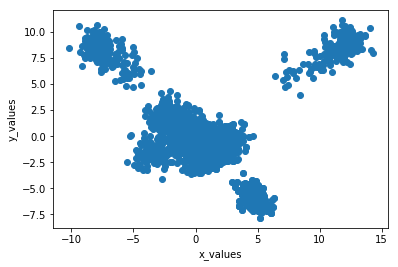

In [17]:
dimension = 2
W = get_components(eig_vals, eig_vecs, n_comp=dimension)

X_lda = X.dot(W).real
plt.plot(X_lda[:,0], X_lda[:,1], 'o')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

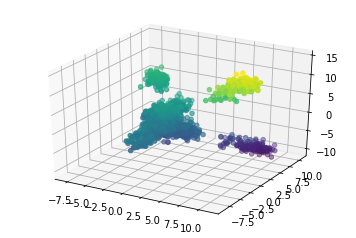

In [18]:
dimension = 3
W = get_components(eig_vals, eig_vecs, n_comp=dimension)
X_lda = X.dot(W).real

ax = plt.axes(projection='3d')
zdata = X_lda[:,0].real
xdata = X_lda[:,1].real
ydata = X_lda[:,2].real
ax.scatter3D(xdata, ydata, zdata, c=zdata);

### Classifying the test images using the rule of nearest neighbor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X, y = select_images(images, labels, n_samples)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
my_img_train = np.random.choice(range(10), 7, replace=False)
my_img_test = np.delete(np.arange(0,10), my_img_train)

In [32]:
X_train_self = my_images[my_img_train].reshape(7,1024)
X_test_self = my_images[my_img_test].reshape(3,1024)
y_train_self = my_labels[my_img_train]
y_test_self = my_labels[my_img_test]

In [33]:
X_train = np.concatenate((X_train, X_train_self), axis=0)
X_test = np.concatenate((X_test, X_test_self), axis=0)
y_train = np.concatenate((y_train, y_train_self), axis=0)
y_test = np.concatenate((y_test, y_test_self), axis=0)

In [34]:
dimensions = [2,3,9]

In [35]:
for dim in dimensions:
    S_W, S_B = scatter_within(X_train, y_train), scatter_between(X_train, y_train)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    W = get_components(eig_vals, eig_vecs, n_comp=dim)
    
    X_lda_train = X_train.dot(W).real
    X_lda_test = X_test.dot(W).real

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = 1)
    # Fit the classifier to the data
    knn.fit(X_lda_train, y_train)
    y_pred = knn.predict(X_lda_test)
    score = knn.score(X_lda_test, y_test)
    print(score)

0.6252446183953033
0.7142857142857143
0.8043052837573386


In [36]:
y_pred[-3:]

array([69., 12., 12.])

In [37]:
y_test[-3:]

array([69., 69., 69.])